In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [2]:
baseball= pd.read_csv('baseball.csv')

In [3]:
baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
baseball.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
baseball.sample(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
18,68,655,5480,1378,274,34,145,412,1299,84,737,682,4.28,1,7,40,116
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75


In [7]:
baseball.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [8]:
baseball.shape

(30, 17)

In [9]:
baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [10]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [11]:
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [12]:
baseball=pd.DataFrame(data=baseball)

In [13]:
baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [14]:
baseball.isnull()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

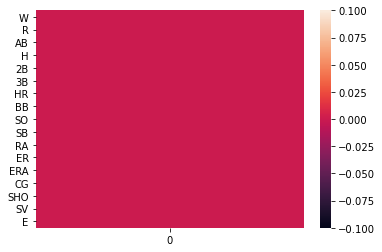

In [16]:
sns.heatmap(baseball.isnull().sum().to_frame())

In [17]:
baseball.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [18]:
baseball.iloc[:,0]

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

<AxesSubplot:xlabel='W', ylabel='Density'>

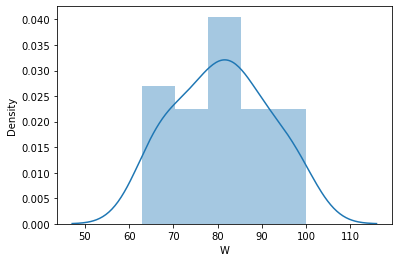

In [19]:
sns.distplot(baseball['W'])

<AxesSubplot:xlabel='R', ylabel='Density'>

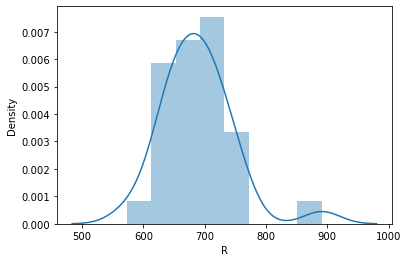

In [20]:
sns.distplot(baseball['R'])

<AxesSubplot:xlabel='AB', ylabel='Density'>

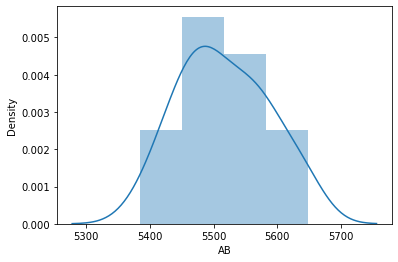

In [21]:
sns.distplot(baseball['AB'])

<AxesSubplot:xlabel='H', ylabel='Density'>

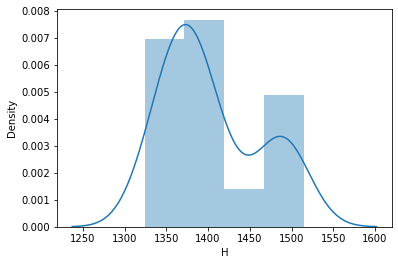

In [22]:
sns.distplot(baseball['H'])

<AxesSubplot:xlabel='2B', ylabel='Density'>

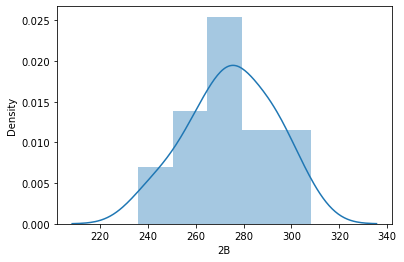

In [23]:
sns.distplot(baseball['2B'])

<AxesSubplot:xlabel='3B', ylabel='Density'>

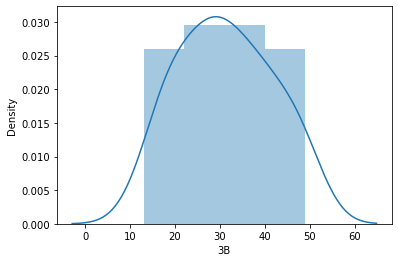

In [24]:
sns.distplot(baseball['3B'])

<AxesSubplot:xlabel='HR', ylabel='Density'>

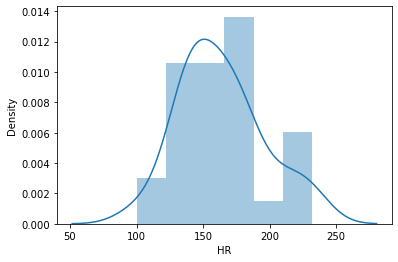

In [25]:
sns.distplot(baseball['HR'])

<AxesSubplot:xlabel='BB', ylabel='Density'>

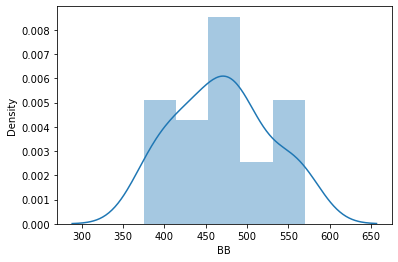

In [26]:
sns.distplot(baseball['BB'])

<AxesSubplot:xlabel='SO', ylabel='Density'>

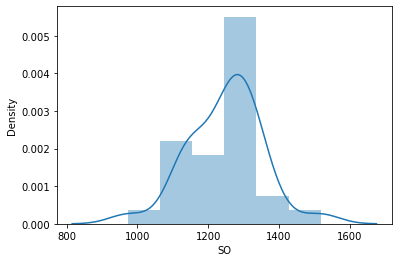

In [27]:
sns.distplot(baseball['SO'])

<AxesSubplot:xlabel='SB', ylabel='Density'>

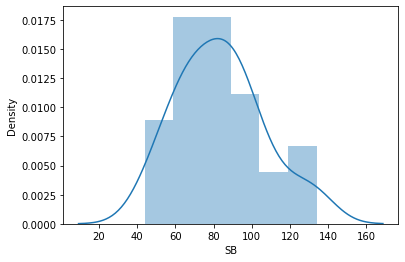

In [28]:
sns.distplot(baseball['SB'])

<AxesSubplot:xlabel='RA', ylabel='Density'>

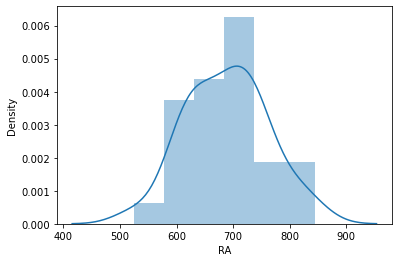

In [29]:
sns.distplot(baseball['RA'])

<AxesSubplot:xlabel='ER', ylabel='Density'>

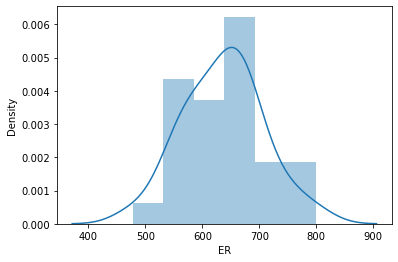

In [30]:
sns.distplot(baseball['ER'])

<AxesSubplot:xlabel='ERA', ylabel='Density'>

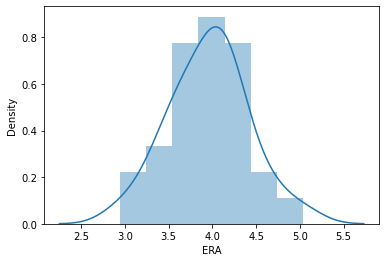

In [31]:
sns.distplot(baseball['ERA'])

<AxesSubplot:xlabel='CG', ylabel='Density'>

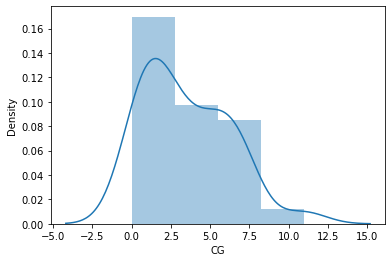

In [32]:
sns.distplot(baseball['CG'])

<AxesSubplot:xlabel='SHO', ylabel='Density'>

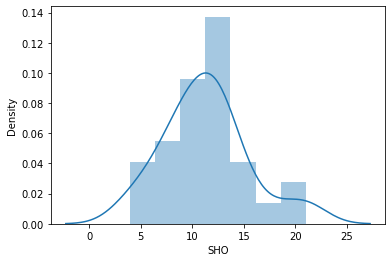

In [33]:
sns.distplot(baseball['SHO'])

<AxesSubplot:xlabel='SV', ylabel='Density'>

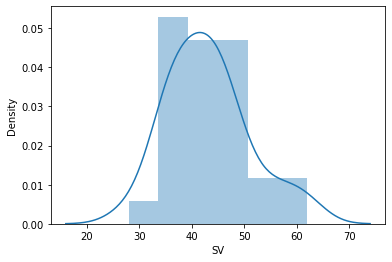

In [34]:
sns.distplot(baseball['SV'])

<AxesSubplot:xlabel='E', ylabel='Density'>

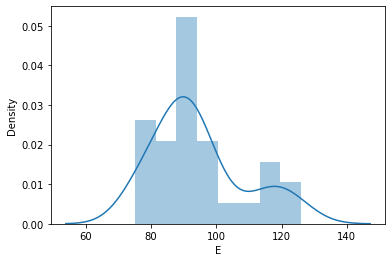

In [35]:
sns.distplot(baseball['E'])

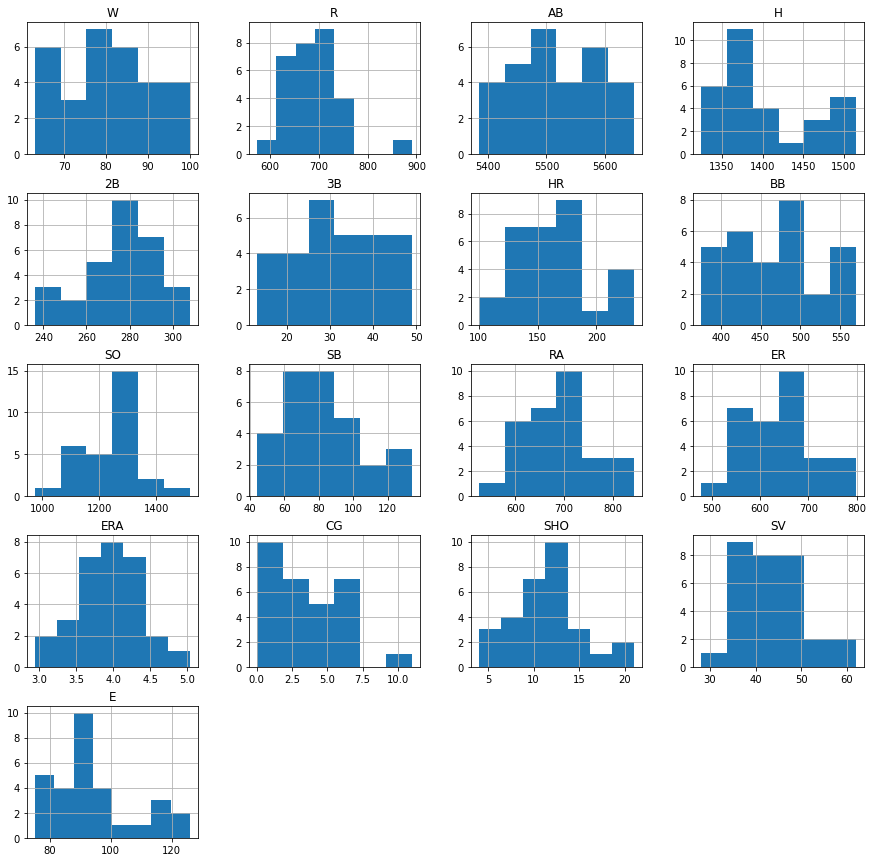

In [36]:
baseball.hist(bins='auto', figsize=(15,15));

<AxesSubplot:>

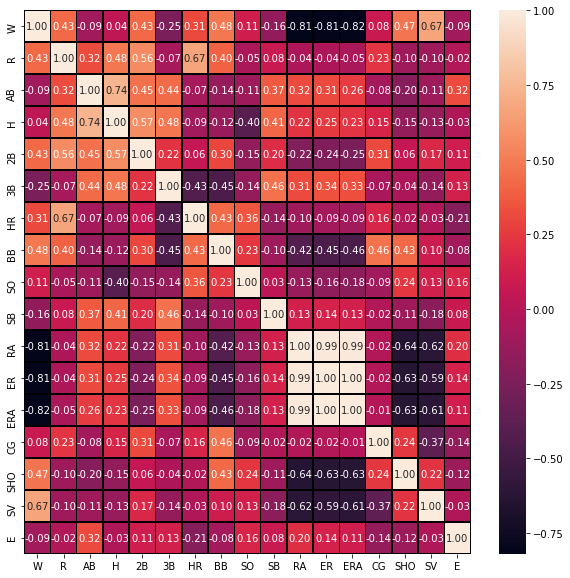

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(baseball.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

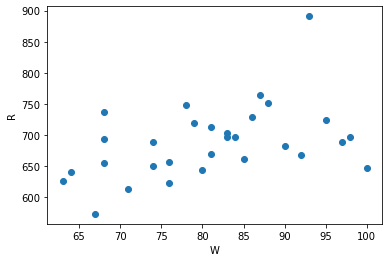

In [38]:
plt.scatter(baseball['W'],baseball['R'])
plt.xlabel('W')
plt.ylabel('R')
plt.show()

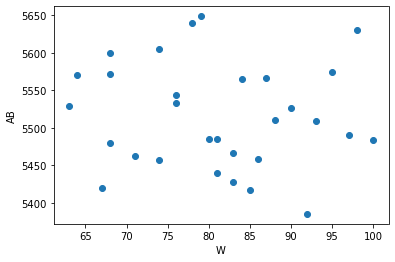

In [39]:
plt.scatter(baseball['W'],baseball['AB'])
plt.xlabel('W')
plt.ylabel('AB')
plt.show()

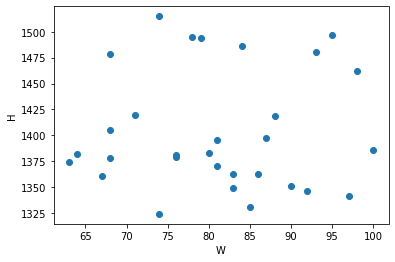

In [40]:
plt.scatter(baseball['W'],baseball['H'])
plt.xlabel('W')
plt.ylabel('H')
plt.show()

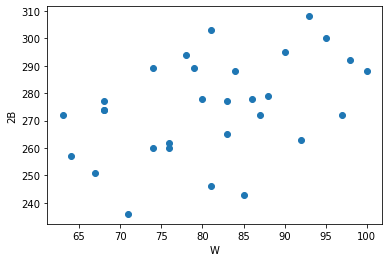

In [41]:
plt.scatter(baseball['W'],baseball['2B'])
plt.xlabel('W')
plt.ylabel('2B')
plt.show()

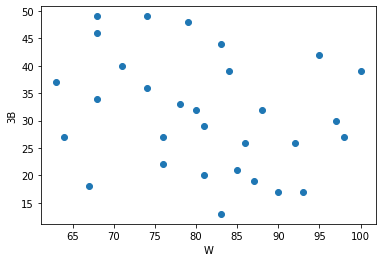

In [42]:
plt.scatter(baseball['W'],baseball['3B'])
plt.xlabel('W')
plt.ylabel('3B')
plt.show()

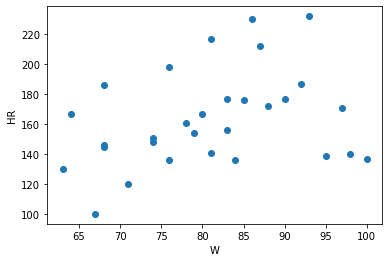

In [43]:
plt.scatter(baseball['W'],baseball['HR'])
plt.xlabel('W')
plt.ylabel('HR')
plt.show()

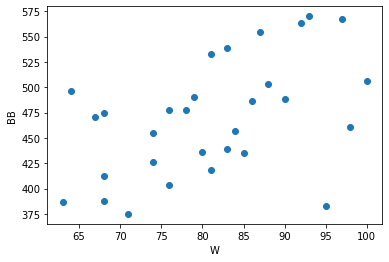

In [44]:
plt.scatter(baseball['W'],baseball['BB'])
plt.xlabel('W')
plt.ylabel('BB')
plt.show()

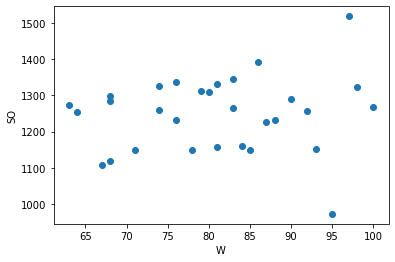

In [45]:
plt.scatter(baseball['W'],baseball['SO'])
plt.xlabel('W')
plt.ylabel('SO')
plt.show()

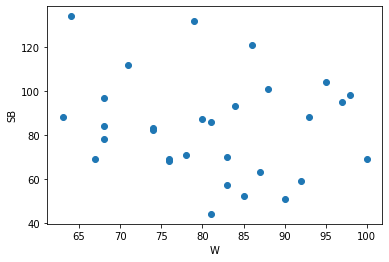

In [46]:
plt.scatter(baseball['W'],baseball['SB'])
plt.xlabel('W')
plt.ylabel('SB')
plt.show()

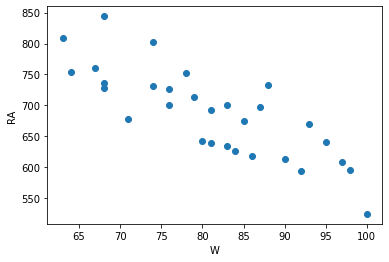

In [47]:
plt.scatter(baseball['W'],baseball['RA'])
plt.xlabel('W')
plt.ylabel('RA')
plt.show()

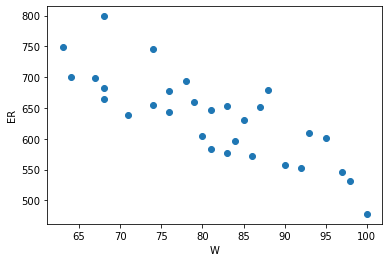

In [48]:
plt.scatter(baseball['W'],baseball['ER'])
plt.xlabel('W')
plt.ylabel('ER')
plt.show()

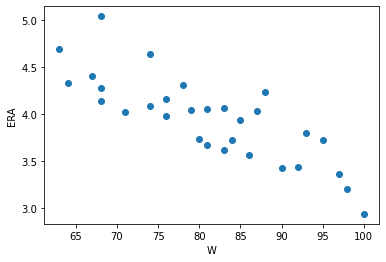

In [49]:
plt.scatter(baseball['W'],baseball['ERA'])
plt.xlabel('W')
plt.ylabel('ERA')
plt.show()

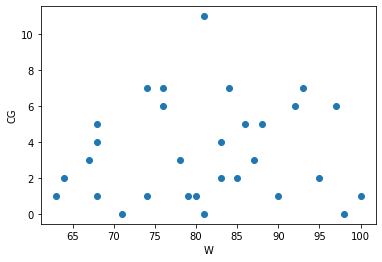

In [50]:
plt.scatter(baseball['W'],baseball['CG'])
plt.xlabel('W')
plt.ylabel('CG')
plt.show()

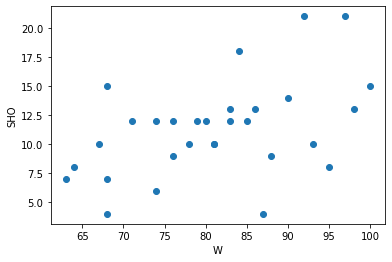

In [51]:
plt.scatter(baseball['W'],baseball['SHO'])
plt.xlabel('W')
plt.ylabel('SHO')
plt.show()

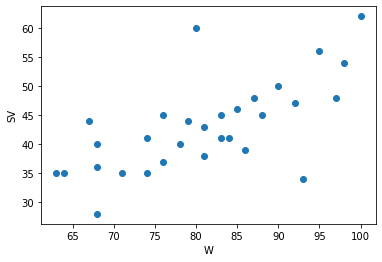

In [52]:
plt.scatter(baseball['W'],baseball['SV'])
plt.xlabel('W')
plt.ylabel('SV')
plt.show()

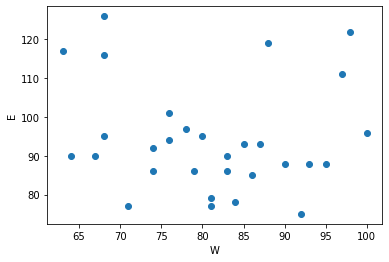

In [53]:
plt.scatter(baseball['W'],baseball['E'])
plt.xlabel('W')
plt.ylabel('E')
plt.show()

In [54]:
baseball['W'].mean()



80.96666666666667

In [55]:
def assign_win_bins(w):
    if w < 50:
        return 1
    if w >= 50 and w <= 69:
        return 2
    if w >= 70 and w <= 89:
        return 3
    if w >= 90 and w <= 109:
        return 4
    if w >= 110:
        return 5

In [56]:
baseball['win_bins'] = baseball['W'].apply(assign_win_bins)

Text(0, 0.5, 'wins')

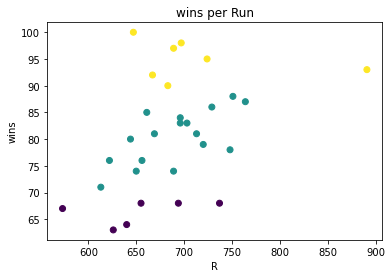

In [57]:
plt.scatter(baseball['R'],baseball['W'],c=baseball['win_bins'])
plt.title('wins per Run')
plt.xlabel('R')
plt.ylabel('wins')

In [58]:
baseball['SO'].value_counts(dropna=False)

1150    2
1344    1
1107    1
1148    1
1274    1
1258    1
1336    1
1267    1
1264    1
1327    1
1518    1
1259    1
1322    1
1255    1
1312    1
1283    1
1119    1
1310    1
1299    1
1331    1
1392    1
1233    1
1231    1
973     1
1227    1
1290    1
1159    1
1157    1
1151    1
Name: SO, dtype: int64

In [59]:
baseball['SV'].value_counts(dropna=False)

35    4
45    3
41    3
40    2
44    2
48    2
47    1
60    1
56    1
28    1
54    1
50    1
34    1
46    1
43    1
39    1
38    1
37    1
36    1
62    1
Name: SV, dtype: int64

In [60]:
baseball['E'].value_counts(dropna=False)

90     3
88     3
86     3
77     2
93     2
95     2
126    1
75     1
78     1
79     1
97     1
116    1
85     1
117    1
119    1
101    1
122    1
92     1
111    1
94     1
96     1
Name: E, dtype: int64

In [61]:
baseball['SHO'].value_counts(dropna=False)

12    7
10    5
13    3
4     2
7     2
8     2
9     2
15    2
21    2
6     1
14    1
18    1
Name: SHO, dtype: int64

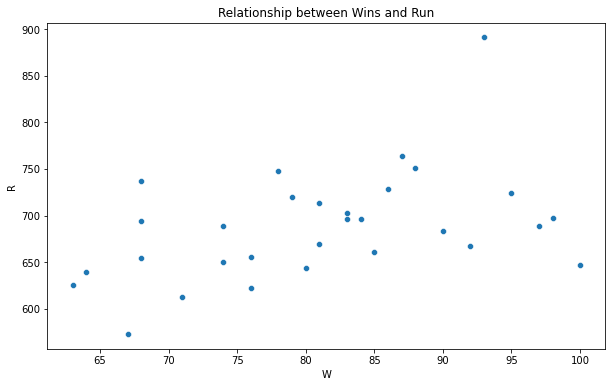

In [62]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Wins and Run')
sns.scatterplot(baseball['W'], baseball['R']);

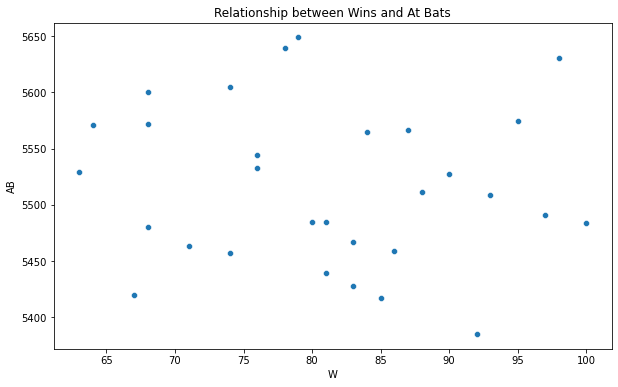

In [63]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Wins and At Bats')
sns.scatterplot(baseball['W'], baseball['AB']);

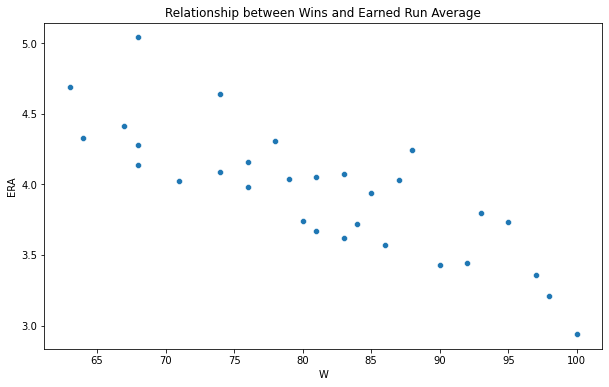

In [64]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Wins and Earned Run Average')
sns.scatterplot(baseball['W'], baseball['ERA']);

In [65]:
corr_mat=baseball.corr()
corr_mat

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,win_bins
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485,0.917736
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.337668
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.063131
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,0.072620
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.394036
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.218563
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.235563
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.397610
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.096319
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.157089


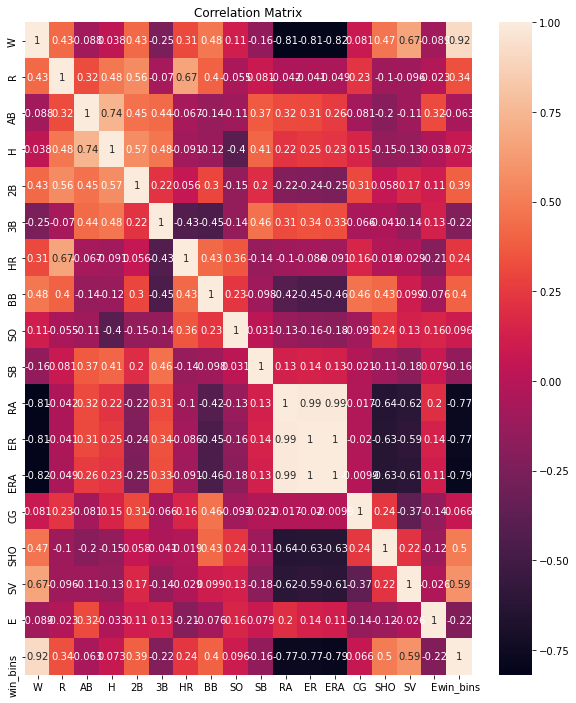

In [66]:
plt.figure(figsize=[10,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

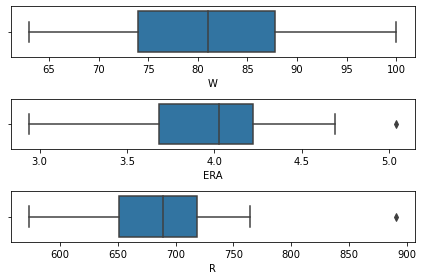

In [67]:
fig, axs = plt.subplots(3, figsize = (6,4))
plt1 = sns.boxplot(baseball['W'],ax = axs[0])
plt2 = sns.boxplot(baseball['ERA'],ax = axs[1])
plt3 = sns.boxplot(baseball['R'],ax = axs[2])
plt.tight_layout()

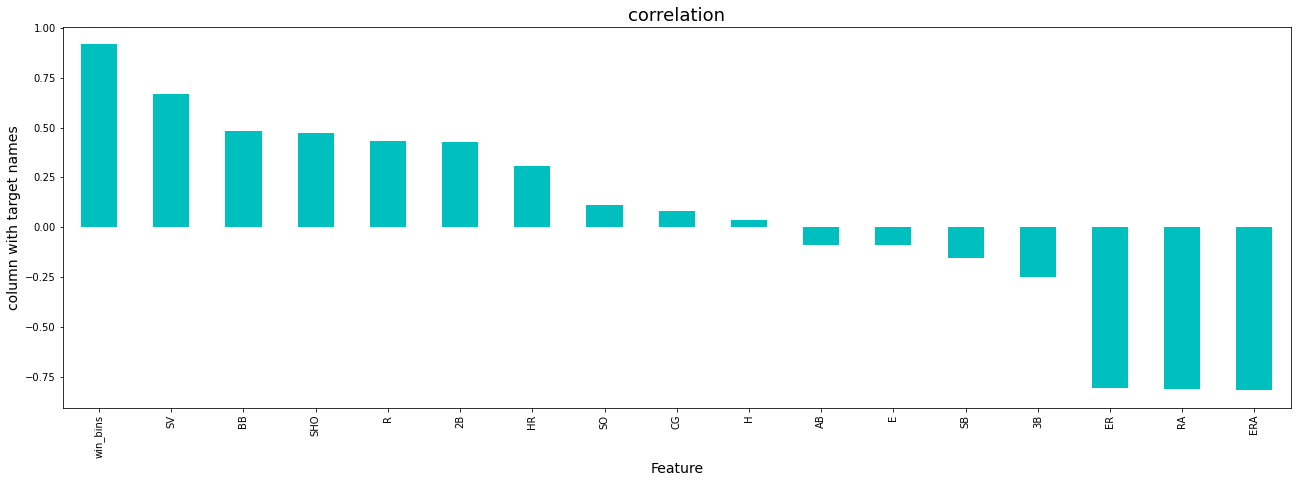

In [68]:
plt.figure(figsize=(22,7))
baseball.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [69]:
x=baseball.drop("CG",axis=1)
y=baseball["CG"]

In [70]:
x=baseball.drop("H",axis=1)
y=baseball["H"]

In [71]:
x=baseball.drop("AB",axis=1)
y=baseball["AB"]

In [72]:
x=baseball.drop("E",axis=1)
y=baseball["E"]

In [73]:
x=baseball.drop("SO",axis=1)
y=baseball["SO"]

In [74]:
x=baseball.drop("SB",axis=1)
y=baseball["SB"]

In [75]:
x

,W,R,AB,H,2B,3B,HR,BB,SO,RA,ER,ERA,CG,SHO,SV,E,win_bins
0,95,724,5575,1497,300,42,139,383,973,641,601,3.73,2,8,56,88,4
1,83,696,5467,1349,277,44,156,439,1264,700,653,4.07,2,12,45,86,3
2,81,669,5439,1395,303,29,141,533,1157,640,584,3.67,11,10,38,79,3
3,76,622,5533,1381,260,27,136,404,1231,701,643,3.98,7,9,37,101,3
4,74,689,5605,1515,289,49,151,455,1259,803,746,4.64,7,12,35,86,3
5,93,891,5509,1480,308,17,232,570,1151,670,609,3.80,7,10,34,88,4
6,87,764,5567,1397,272,19,212,554,1227,698,652,4.03,3,4,48,93,3
7,81,713,5485,1370,246,20,217,418,1331,693,646,4.05,0,10,43,77,3
8,80,644,5485,1383,278,32,167,436,1310,642,604,3.74,1,12,60,95,3
9,78,748,5640,1495,294,33,161,478,1148,753,694,4.31,3,10,40,97,3


In [76]:
x.skew()

W           0.047089
R           1.200786
AB          0.183437
H           0.670254
2B         -0.230650
3B          0.129502
HR          0.516441
BB          0.158498
SO         -0.156065
RA          0.045734
ER          0.058710
ERA         0.053331
CG          0.736845
SHO         0.565790
SV          0.657524
E           0.890132
win_bins   -0.036797
dtype: float64

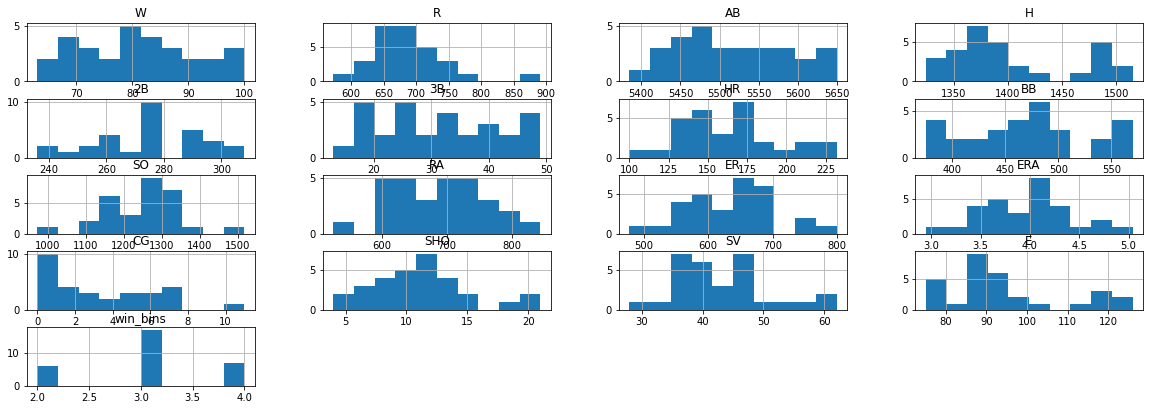

In [77]:
x.hist(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [78]:
s = SelectKBest(f_classif, k=15)

In [79]:
s.fit(x,y)

SelectKBest(k=15)